# Linear discriminant analysis (SKL)
Supervised data compression

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

#Load data
dataObj = load_wine()
X = dataObj.data
y = dataObj.target

# Create DataFrame with features
dfX = pd.DataFrame(X)
dfX.columns = dataObj.feature_names
display(dfX.head())
print(dfX.shape)

# Standardize the original dataset (very important)
sc = StandardScaler()
X_std = sc.fit_transform(X)
temp = pd.DataFrame(data=X_std, columns=dfX.columns)
display(temp.head())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


## Exploring LDA

### Choose number of components
- Cannot be larger than `n_class - 1`
- Here, `max = 2`

In [15]:
n_components = 2

### Setting up

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=n_components)

lda.fit(X_std, y)

LinearDiscriminantAnalysis(n_components=2)

### Transformation matrix

In [17]:
# Name of the column
cols = [f'nu_{i}' for i in range(1,n_components+1) ]

W = lda.scalings_

dfW = pd.DataFrame(data=W, index=dfX.columns, columns=cols)

display(dfW)

,nu_1,nu_2
alcohol,0.326569,0.705754
malic_acid,-0.184094,0.340194
ash,0.100969,0.641759
alcalinity_of_ash,-0.515503,-0.487473
magnesium,0.030813,-0.006591
total_phenols,-0.385720,-0.020104
flavanoids,1.654628,-0.490054
nonflavanoid_phenols,0.185636,-0.202407
proanthocyanins,-0.076533,-0.175270
color_intensity,-0.820805,0.585410


### Explained variance ratio

In [18]:
lda.explained_variance_ratio_

array([0.68747889, 0.31252111])

### Visualize explained variance ratio

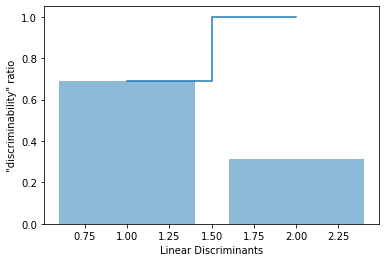

In [19]:
plt.bar(range(1, 3), lda.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 3), np.cumsum(lda.explained_variance_ratio_), where='mid')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.show()

### Transformation

In [20]:
# Columns names
cols = [f'pca_{i}' for i in range(1,n_components+1) ]

# Transformation from SKL
X_std_pca = lda.transform(X_std)
print('From SKL')
display(pd.DataFrame(data=X_std_pca, columns=cols).head())

# Verification
Z = X_std.dot(W)
print('Verification')
display(pd.DataFrame(data=Z, columns=cols).head())

From SKL


,pca_1,pca_2
0,4.700244,1.979138
1,4.301958,1.170413
2,3.420720,1.429101
3,4.205754,4.002871
4,1.509982,0.451224


Verification


,pca_1,pca_2
0,4.700244,1.979138
1,4.301958,1.170413
2,3.420720,1.429101
3,4.205754,4.002871
4,1.509982,0.451224


## Using LDA as visualization tool

### Without LDA

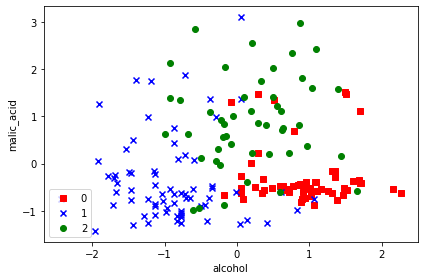

In [21]:
colors = ["r", "b", "g"]
markers = ["s", "x", "o"]
fig, ax = plt.subplots()
for l, c, m in zip(np.unique(y), colors, markers):
    ax.scatter(X_std[y == l, 0], X_std[y == l, 1], c=c, label=l, marker=m)
ax.set_xlabel(dfX.columns[0])
ax.set_ylabel(dfX.columns[1])
ax.legend(loc="lower left")
plt.tight_layout()
plt.show()

### With LDA

In [22]:
X_std_lda = LDA(n_components=2).fit_transform(X_std, y)

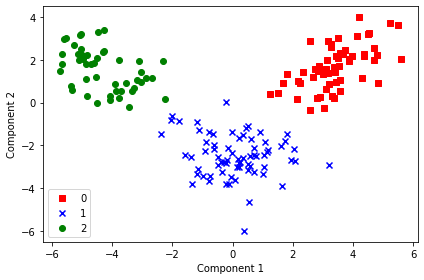

In [23]:
colors = ["r", "b", "g"]
markers = ["s", "x", "o"]
fig, ax = plt.subplots()
for l, c, m in zip(np.unique(y), colors, markers):
    ax.scatter(X_std_lda[y == l, 0], X_std_lda[y == l, 1], c=c, label=l, marker=m)
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.legend(loc="lower left")
plt.tight_layout()
plt.show()

## Experiment with classifier

### Setting up

In [24]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RF

paramSetAll = {
    "lr": {"clf": LR, "solver": "liblinear", "C": 10000, "max_iter": 100},
    "knn": {"clf":KNN, "n_neighbors": 5, "p": 1, "algorithm": "auto",},
    "dt": {"clf":DT, "criterion": "gini", "max_depth": 100},
    "rf": {"clf": RF,
        "criterion": "gini",
        "n_estimators": 100,
        "max_samples": None,
        "max_features": "auto",
        "max_depth": None,
    },
}

In [25]:
def training(X_train, y_train, X_test, y_test):

    for name, paramsSet in paramSetAll.items():

        clf = paramsSet['clf']
        params = { k:v for k, v in paramsSet.items() if k != 'clf' }

        #clf = LogisticRegression()
        clf = clf(**params)

        # Training
        clf.fit(X_train, y_train)

        # Accuracy scores
        y_pred = clf.predict(X_train)
        acc_train = accuracy_score(y_train, y_pred)

        y_pred = clf.predict(X_test)
        acc_test = accuracy_score(y_test, y_pred)

        print(f'Classifier: {name:5s}, Train Acc: {acc_train:4.2f}, Test Acc: {acc_test:4.2f}')
    print(f"--------------------------------------------------")

In [26]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Standardize
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
print(X_train_std.shape)

(124, 13)


### No transformation

In [27]:
training(X_train_std, y_train, X_test_std, y_test)

Classifier: lr   , Train Acc: 1.00, Test Acc: 1.00
Classifier: knn  , Train Acc: 0.97, Test Acc: 0.98
Classifier: dt   , Train Acc: 1.00, Test Acc: 0.96
Classifier: rf   , Train Acc: 1.00, Test Acc: 0.98
--------------------------------------------------


### With LDA

In [28]:
lda = LDA(n_components=2)

# Notice that we only use X_train to fit
X_train_std_lda = lda.fit_transform(X_train_std, y_train)
X_test_std_lda = lda.transform(X_test_std)

training(X_train_std_lda, y_train, X_test_std_lda, y_test)

Classifier: lr   , Train Acc: 1.00, Test Acc: 1.00
Classifier: knn  , Train Acc: 0.98, Test Acc: 1.00
Classifier: dt   , Train Acc: 1.00, Test Acc: 0.96
Classifier: rf   , Train Acc: 1.00, Test Acc: 0.96
--------------------------------------------------
